训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

In [1]:
import os
import workspace_path
os.chdir(workspace_path.path)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  # windows中用来正常显示中文标
plt.rcParams['axes.unicode_minus']=False  # windows中用来正常显示负号

## 载入训练日志

In [3]:
# 日志文件路径
# full_log_path = 'myFolder/work_dirs/ZihaoDataset-FastSCNN/20230808_033757/vis_data/scalars.json'
# single_log_path = 'myFolder/work_dirs/ZihaoDataset-FastSCNN/20230808_033757/20230808_033757.log'

# full_log_path = 'myFolder/work_dirs/ZihaoDataset-DeepLabV3plus/20230808_135009/vis_data/scalars.json'
# single_log_path = 'myFolder/work_dirs/ZihaoDataset-DeepLabV3plus/20230808_135009/20230808_135009.log'

full_log_path = 'myFolder/work_dirs/ZihaoDataset-PSPNet/20230808_233750/vis_data/scalars.json'
single_log_path = 'myFolder/work_dirs/ZihaoDataset-PSPNet/20230808_233750/20230808_233750.log'

In [4]:
with open(full_log_path, "r") as f:
    json_list = f.readlines()
print('日志文件的长度为: ',len(json_list))
json_list

日志文件的长度为:  481


['{"lr": 0.009997549655046198, "data_time": 0.006911754608154297, "loss": 1.7767832279205322, "decode.loss_ce": 1.2202179551124572, "decode.acc_seg": 69.97689819335938, "aux.loss_ce": 0.5565652847290039, "aux.acc_seg": 69.98109436035156, "time": 0.26926426887512206, "iter": 12, "memory": 18644, "step": 12}\n',
 '{"lr": 0.00997794446709763, "data_time": 0.0057040929794311525, "loss": 0.6394212961196899, "decode.loss_ce": 0.44795726537704467, "decode.acc_seg": 83.51879119873047, "aux.loss_ce": 0.19146403297781944, "aux.acc_seg": 84.0250015258789, "time": 0.2669335126876831, "iter": 100, "memory": 5935, "step": 100}\n',
 '{"lr": 0.009955660594668054, "data_time": 0.006015634536743164, "loss": 0.7306239575147628, "decode.loss_ce": 0.5148138210177422, "decode.acc_seg": 77.04629516601562, "aux.loss_ce": 0.21581013947725297, "aux.acc_seg": 81.1553955078125, "time": 0.2674033880233765, "iter": 200, "memory": 5935, "step": 200}\n',
 '{"lr": 0.009933371122565919, "data_time": 0.00584049224853515

In [5]:
import pandas as pd
df_train = pd.DataFrame()   # 二维数据表
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index = True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [6]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009998,0.006912,1.776783,1.220218,69.976898,0.556565,69.981094,0.269264,12.0,18644.0,12.0
1,0.009978,0.005704,0.639421,0.447957,83.518791,0.191464,84.025002,0.266934,100.0,5935.0,100.0
2,0.009956,0.006016,0.730624,0.514814,77.046295,0.215810,81.155396,0.267403,200.0,5935.0,200.0
3,0.009933,0.005840,0.552276,0.384156,92.658905,0.168120,93.736458,0.269050,300.0,5935.0,300.0
4,0.009911,0.005600,0.461711,0.320883,76.607513,0.140829,77.849388,0.269152,400.0,5935.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
396,0.000257,0.005742,0.050866,0.032932,99.009613,0.017934,98.800468,0.270582,39600.0,5936.0,39600.0
397,0.000221,0.005493,0.042909,0.028179,99.229523,0.014731,99.040413,0.269667,39700.0,5936.0,39700.0
398,0.000184,0.005967,0.045320,0.030095,98.678970,0.015225,98.142914,0.270697,39800.0,5936.0,39800.0
399,0.000145,0.006373,0.056979,0.034009,99.278732,0.022970,98.863220,0.271417,39900.0,5936.0,39900.0


In [7]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,77.98,53.36,68.34,62.82,75.39,75.12,68.34,0.028349,0.766007,500.0
1,94.64,74.34,85.63,83.97,83.97,84.17,85.63,0.006414,0.081944,1000.0
2,88.68,67.16,83.38,79.57,79.57,77.51,83.38,0.006719,0.081965,1500.0
3,92.35,74.11,85.26,84.42,84.42,84.95,85.26,0.006428,0.081414,2000.0
4,90.89,71.87,86.23,82.75,82.75,81.29,86.23,0.006374,0.081598,2500.0
...,...,...,...,...,...,...,...,...,...,...
74,96.83,82.63,89.36,89.98,89.98,91.16,89.36,0.005919,0.080974,37500.0
75,96.70,82.87,89.33,90.17,90.17,91.52,89.33,0.006222,0.081485,38000.0
76,97.01,83.62,90.22,90.68,90.68,91.34,90.22,0.005981,0.080948,38500.0
77,96.96,83.06,89.20,90.24,90.24,91.80,89.20,0.007014,0.082229,39000.0


## 导出训练日志表格

In [12]:
df_train.to_csv('myFolder/chart/FastSCNN-train.csv',index=False)
df_test.to_csv('myFolder/chart/FastSCNN-test.csv',index=False)

## 总体所有类别可视化

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

### 训练集损失函数

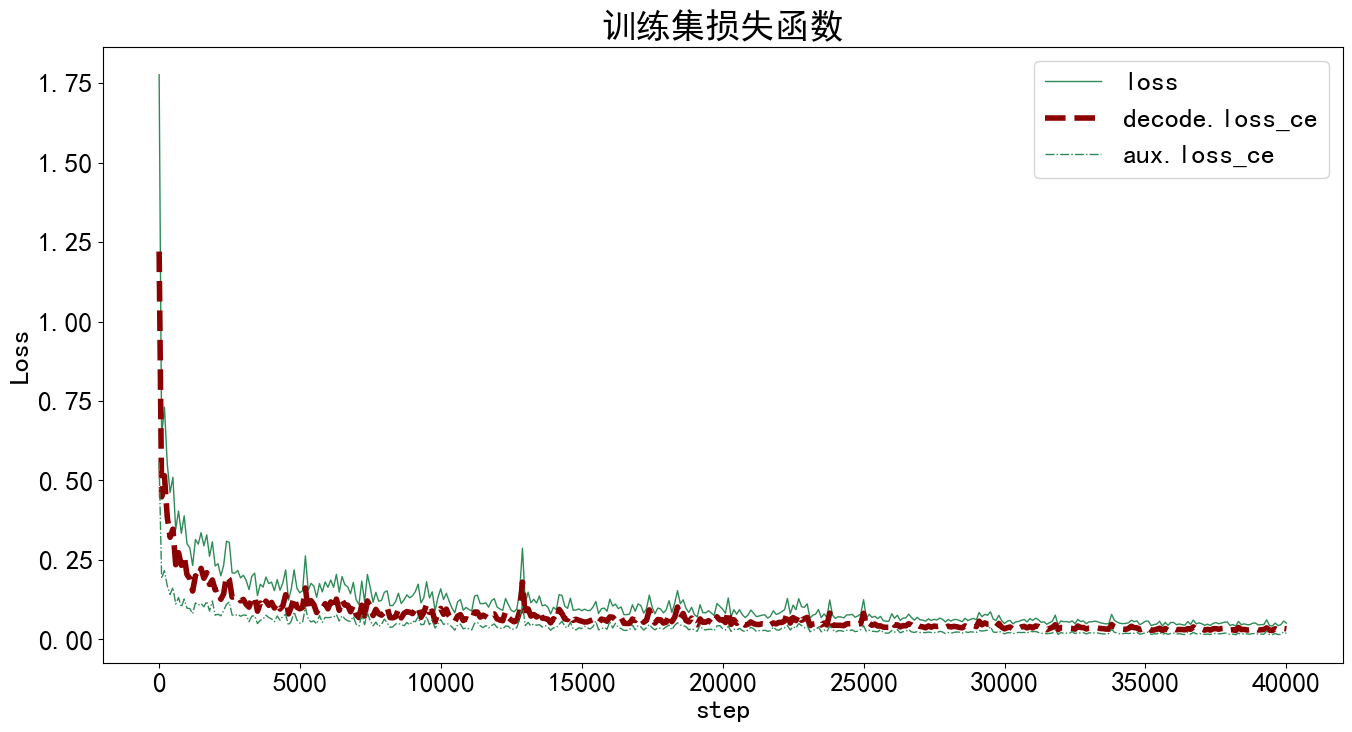

In [15]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce' , 'aux_0.loss_ce' ,'aux_1.loss_ce']

plt.figure(figsize=(16, 8))
x = df_train['step']
for y in metrics:
    try:
        # 绘制折线图，x轴为训练步骤，y轴为对应的指标数据。label=y会在图例中显示指标名称 
        plt.plot(x, df_train[y], label=y, **get_line_arg() )
    except: 
        pass
plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.legend(fontsize=20)
plt.savefig('myFolder/chart/FastSCNN-训练集损失函数.pdf', dpi=120, bbox_inches='tight')
plt.show()

### 训练集准确率

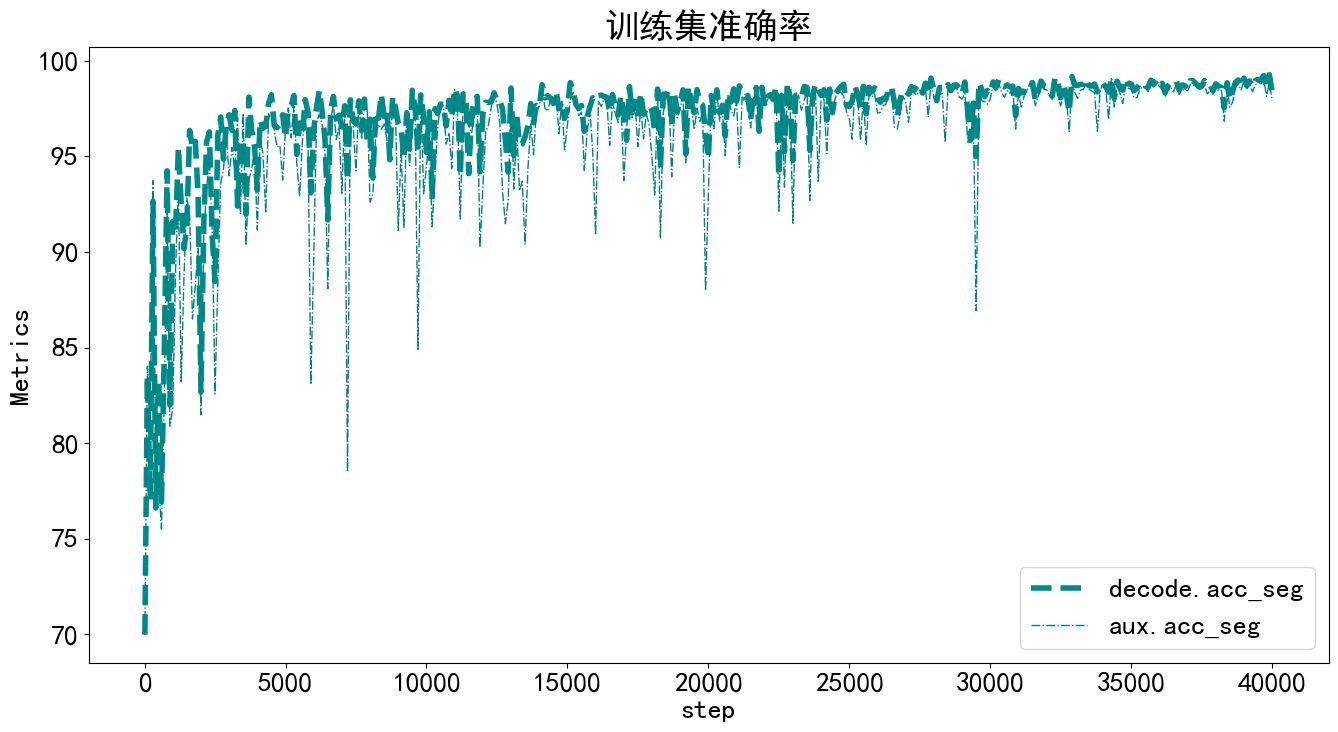

In [16]:
metrics = ['decode.acc_seg', 'aux.acc_seg' , 'aux_0.acc_seg', 'aux_1.acc_seg']
plt.figure(figsize=(16, 8))
x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass
plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.legend(fontsize=20)

plt.savefig('myFolder/chart/FastSCNN-训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

### 测试集评估指标

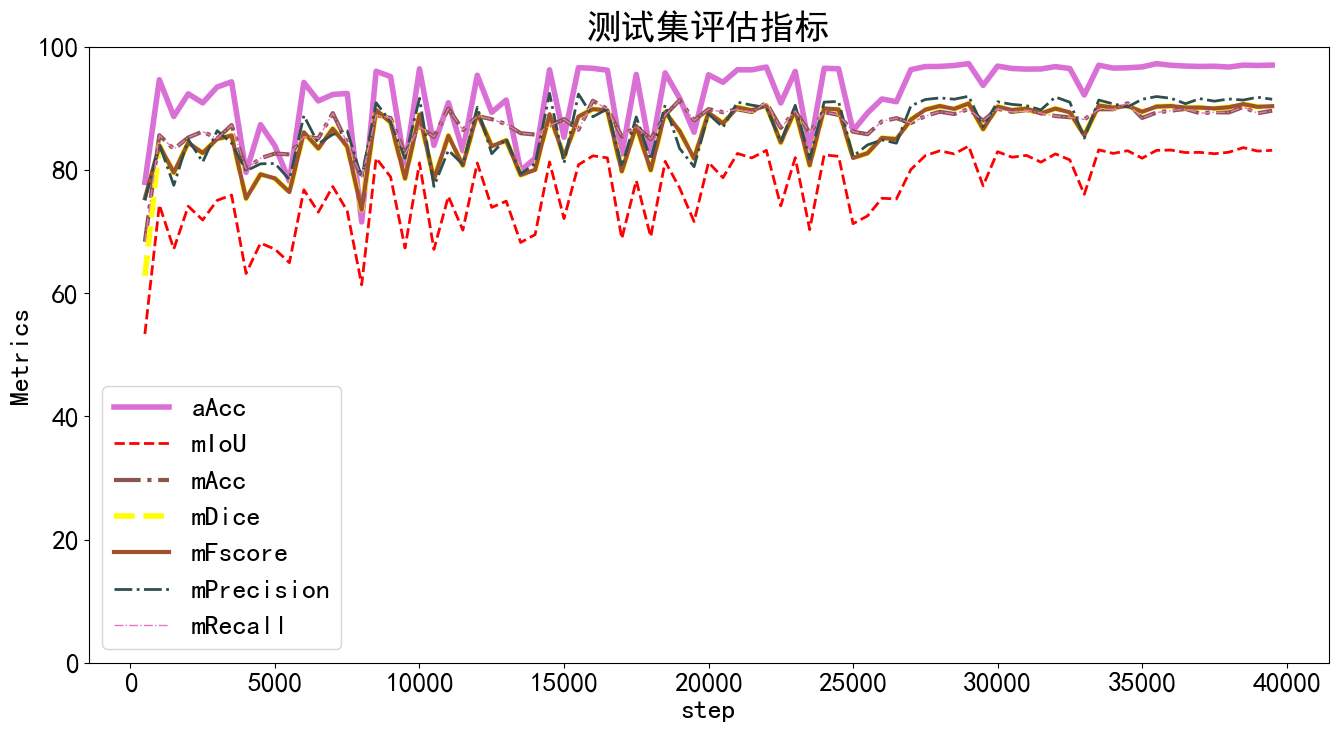

In [17]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

plt.figure(figsize=(16, 8))
x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass
plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.legend(fontsize=20)
plt.savefig('myFolder/chart/FastSCNN-测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')
plt.show()

## 单个语义类别可视化

In [18]:
# 类别列表
class_list = ['background', 'red', 'green', 'white', 'seed-black', 'seed-white']

In [19]:
with open(single_log_path, 'r') as f:
    logs = f.read()

In [20]:
## 定义正则表达式
import re
import numpy as np

def transform_table_line(raw):
    raw = list(map(lambda x: x.split('|'), raw))
    raw = list(map(
        lambda row: list(map(
            lambda col: float(col.strip()),
            row
        )),
        raw
    ))
    return raw

metrics_json = {}
for each_class in class_list: # 遍历每个类别
    re_pattern = r'\s+{}.*?\|(.*)?\|'.format(each_class) # 定义该类别的正则表达式
    metrics_json[each_class] = {}
    metrics_json[each_class]['re_pattern'] = re.compile(re_pattern)
# 匹配
for each_class in class_list: # 遍历每个类别
    find_string = re.findall(metrics_json[each_class]['re_pattern'], logs) # 粗匹配
    find_string = transform_table_line(find_string) # 精匹配
    metrics_json[each_class]['metrics'] = find_string

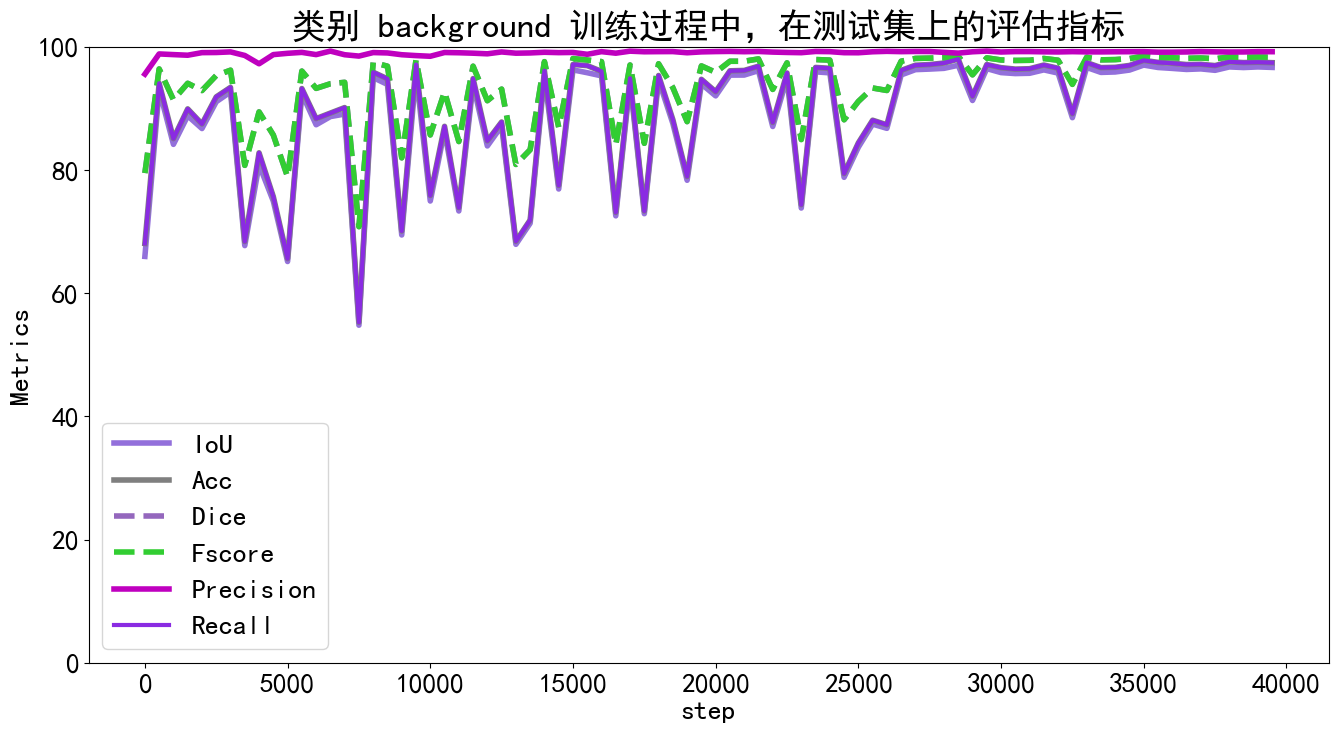

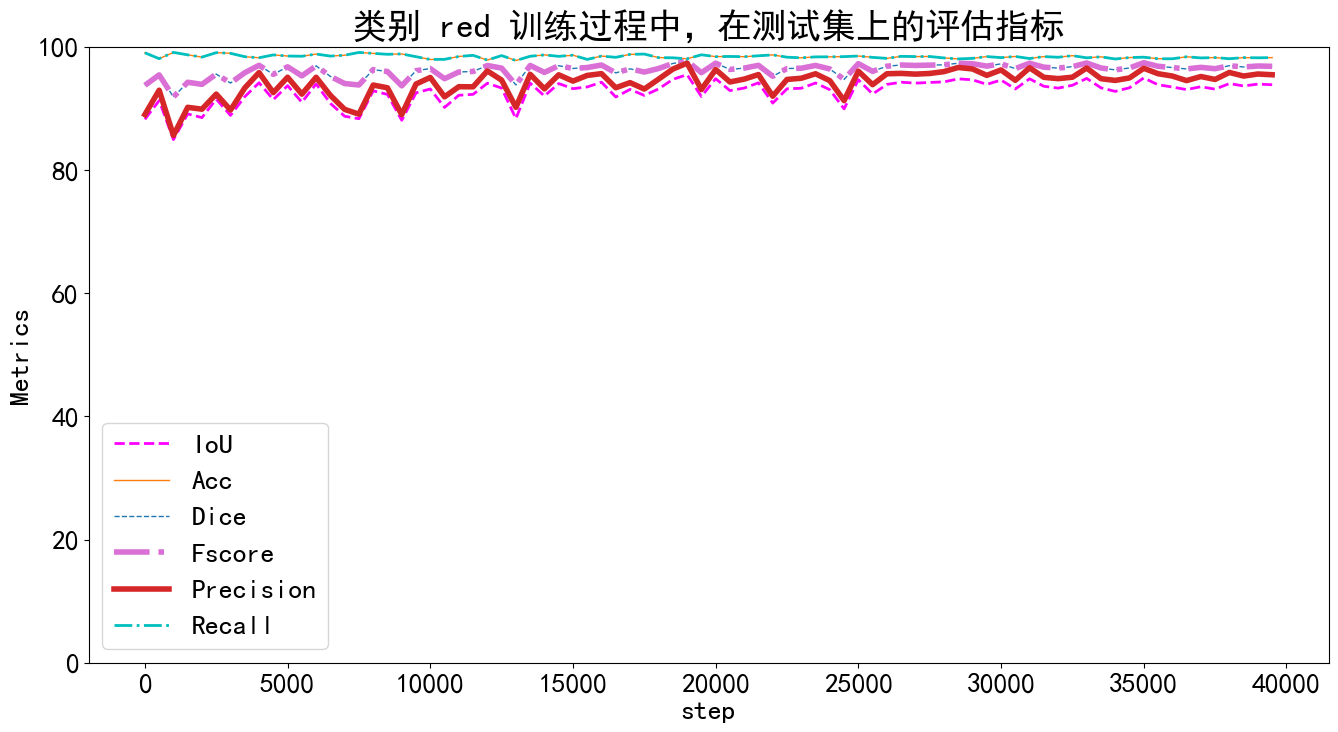

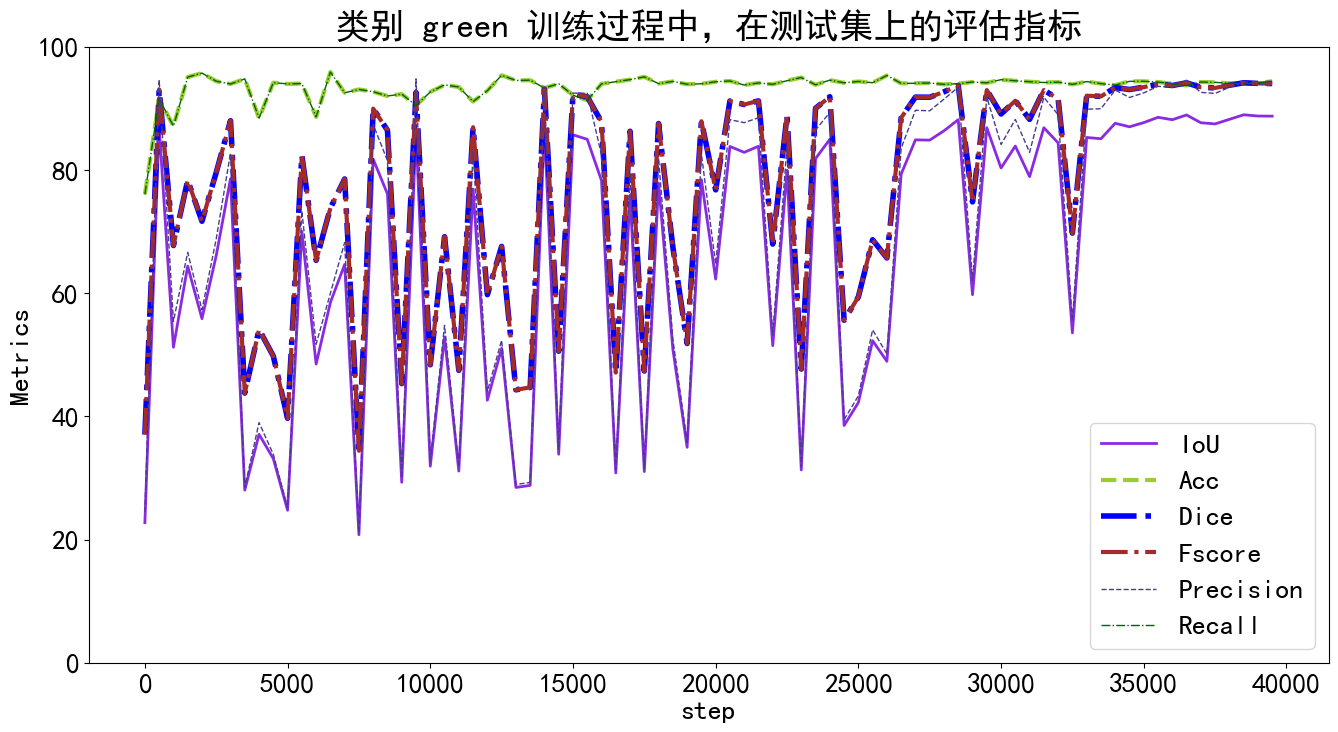

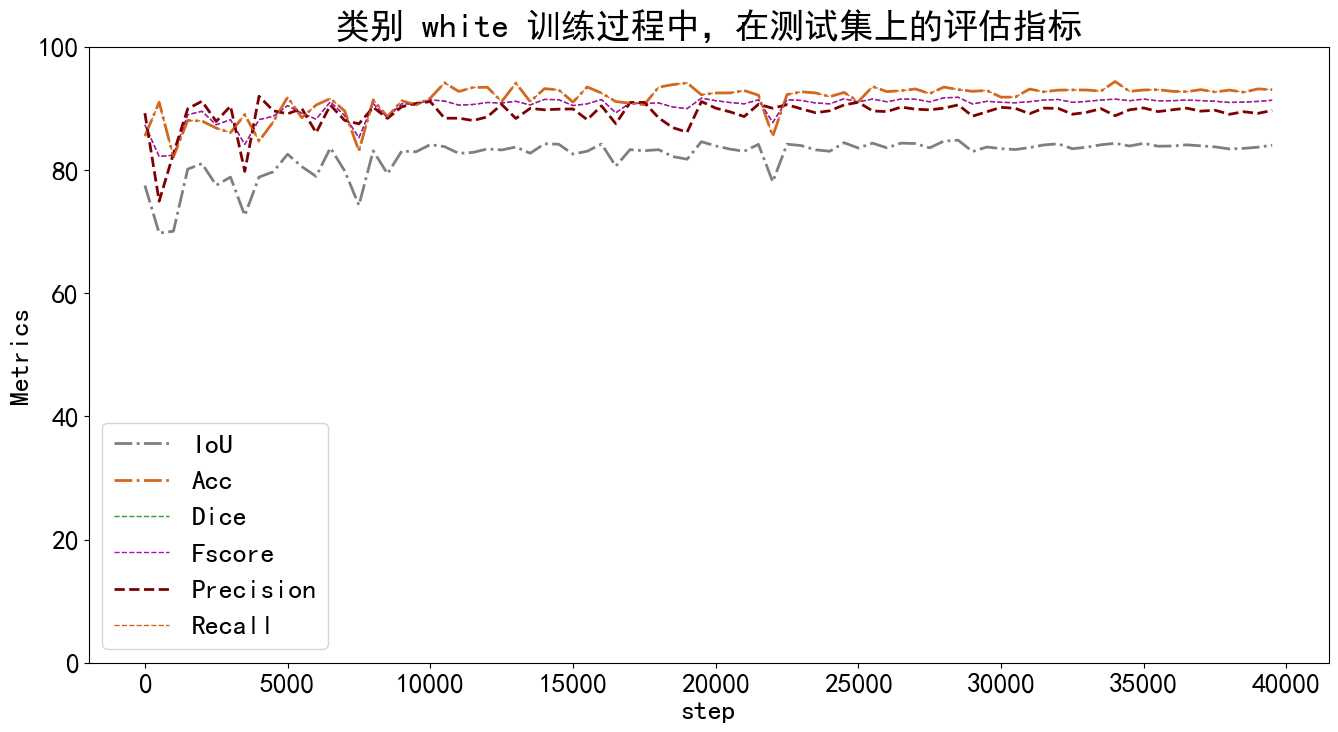

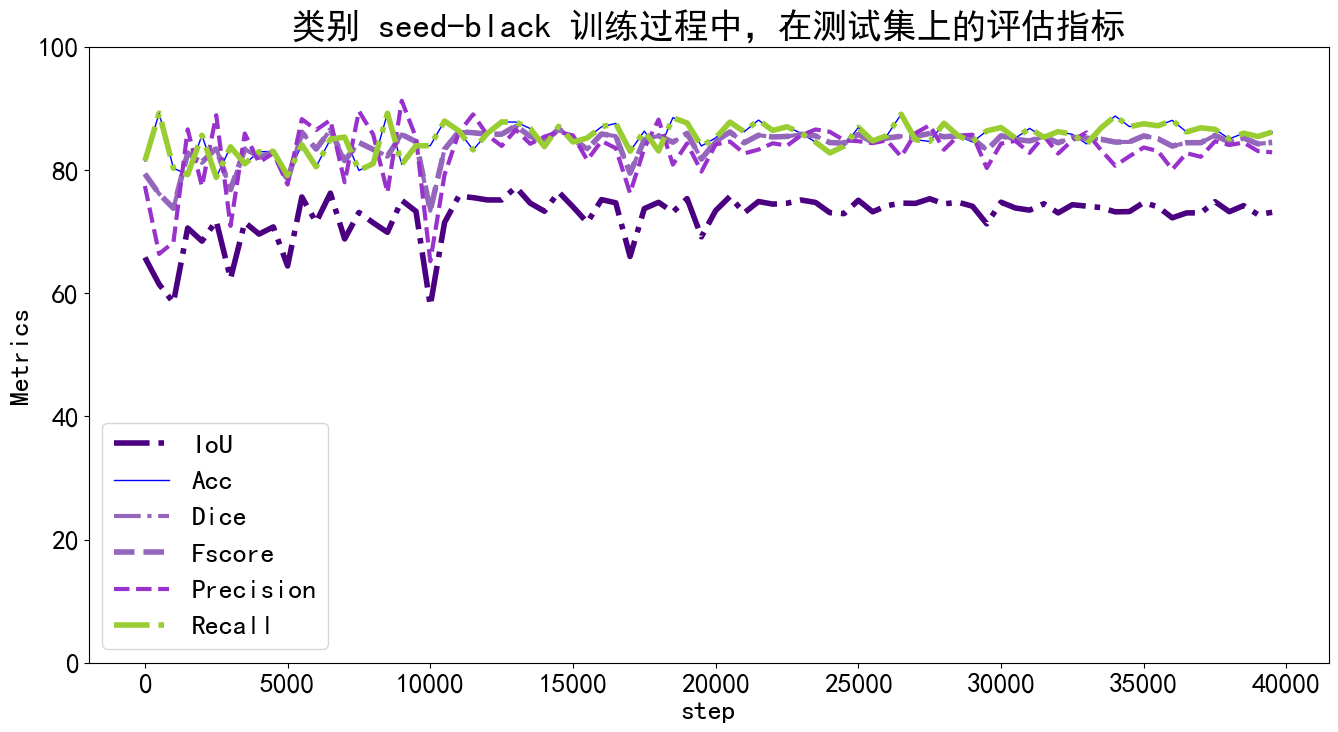

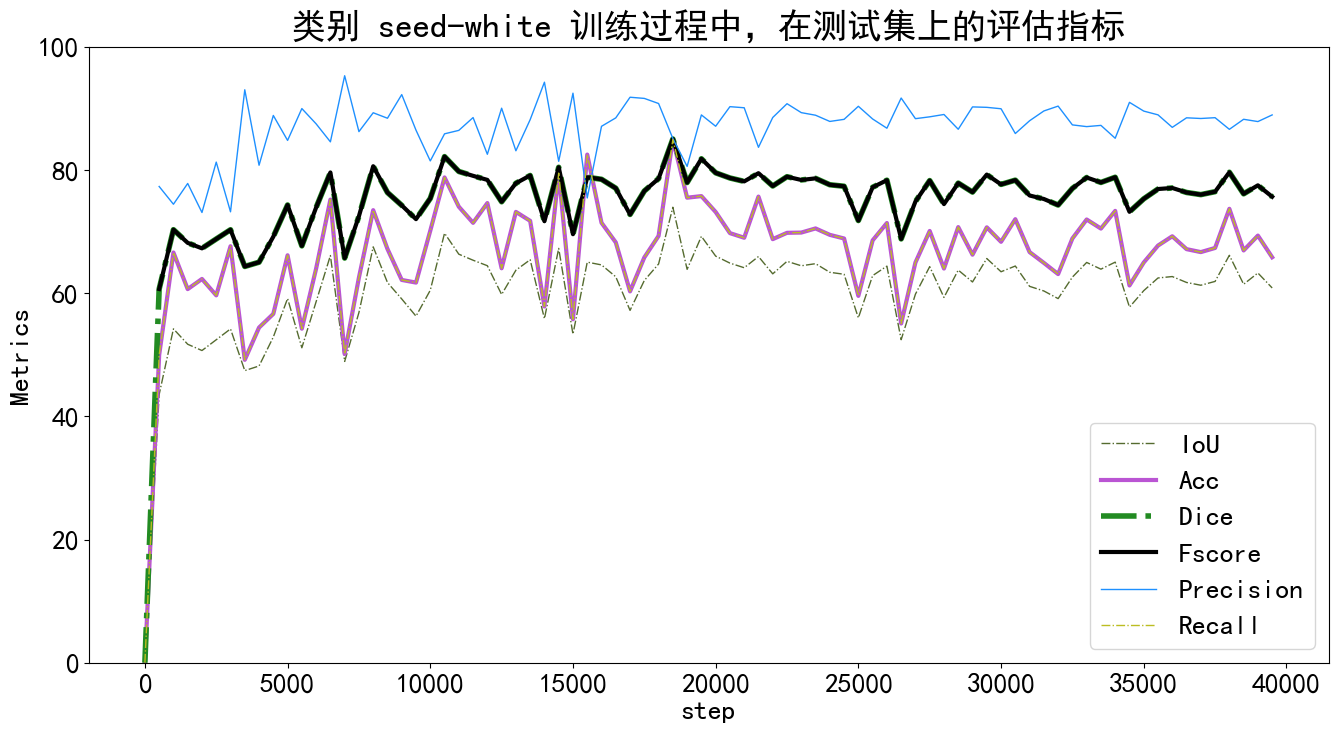

In [22]:
# x = range(0, 30000, 500)
x = range(0,40000,500)
for each_class in class_list: # 遍历每个类别
    each_class_metrics = np.array(metrics_json[each_class]['metrics'])
    if len(x) != len(each_class_metrics):
        raise ValueError('类别 {} 训练过程中，在测试集上的评估指标的长度为 {}，而x的长度为 {}，不一致！'.format(each_class, len(each_class_metrics), len(x)))
    plt.figure(figsize=(16, 8))
    for idx, each_metric in enumerate(['IoU', 'Acc', 'Dice', 'Fscore', 'Precision', 'Recall']):
        try:
            plt.plot(x, each_class_metrics[:,idx], label=each_metric, **get_line_arg())
        except:
            pass
    plt.tick_params(labelsize=20)
    plt.ylim([0, 100])
    plt.xlabel('step', fontsize=20)
    plt.ylabel('Metrics', fontsize=20)
    plt.title('类别 {} 训练过程中，在测试集上的评估指标'.format(each_class), fontsize=25)
    plt.legend(fontsize=20)
    plt.savefig('myFolder/chart/类别 {} 训练过程评估指标.pdf'.format(each_class), dpi=120, bbox_inches='tight')
    plt.show()